# Pro cyclist KOMs

In [9]:
%matplotlib inline

import stravalib
import Strava_Download
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

try:
    f = open( 'mytoken.txt', 'r' )
    mytoken = f.read()
    f.close()
    client = stravalib.Client(access_token = mytoken) 
except:
    print('access_token required')

athlete = client.get_athlete(577039)
print(athlete.firstname, athlete.lastname)

Tobias Dahlhaus


In [1]:
types = ['time', 'latlng', 'distance', 'altitude', 'velocity_smooth',
'heartrate', 'cadence', 'watts', 'temp', 'moving', 'grade_smooth']


OK lets see what we can get on Kristian House

In [11]:
KH = client.get_athlete(173213)

In [12]:
KH.firstname, KH.lastname

('Kristian', 'House')

Strava permits downloading of an athlete's KOMs. These are provided as an iterator of SegmentEfforts. A SegmentEfffort is in the BaseEffort class with the additional device_watts attribute to indicate if a power meter was in use.

In [14]:
koms = client.get_athlete_koms(173213)

In [15]:
print(len([k for k in koms]))
for k in koms:
    print(k)

326
<SegmentEffort id=22099134106 name='Whitchurch Road' resource_state=2>
<SegmentEffort id=22099134164 name='Whitchurch to Nantwich' resource_state=2>
<SegmentEffort id=22099133978 name='Whitchurch to Shrops canal dash' resource_state=2>
<SegmentEffort id=22057273016 name='Home commute' resource_state=2>
<SegmentEffort id=21864427582 name='Bridgend Vale loop' resource_state=2>
<SegmentEffort id=21794042983 name='Pootings Road Climb' resource_state=2>
<SegmentEffort id=21454809538 name='71 West - Bee Creek Road to R. O. Drive' resource_state=2>
<SegmentEffort id=21300003300 name='Bridge to Serene Hills' resource_state=2>
<SegmentEffort id=21247601604 name='FSR Day 2 Lap' resource_state=2>
<SegmentEffort id=20774667093 name='E 99 Climb' resource_state=2>
<SegmentEffort id=18095296625 name='Short Climb' resource_state=2>
<SegmentEffort id=18095296759 name='Chapel Lane Kelsall ' resource_state=2>
<SegmentEffort id=18095296702 name='Roughlow' resource_state=2>
<SegmentEffort id=1809529666

It is possible to select one of the efforts and download the associated effort_stream. This is a sneaky way around the not being able to download the activity_stream. Let's focus on a particular effort: SegmentEffort id=10843119613 name='Sean Connery villa > Villaricos first roundabout'. A SegmentEffort is in this class class stravalib.model.BaseEffort(bind_client=None, **kwargs)[source]
name
The name of the segment

segment
The associated stravalib.model.Segment for this effort

activity
The associated stravalib.model.Activity

athlete
The associated stravalib.model.Athlete

kom_rank
1-10 segment KOM ranking for athlete at time of upload

pr_rank
1-3 personal record ranking for athlete at time of upload

moving_time
datetime.timedelta

elapsed_time
datetime.timedelta

start_date
datetime.datetime when effort was started in GMT

start_date_local
datetime.datetime when effort was started in activity timezone for this effort

distance
The distance for this effort.

average_watts
Average power during effort

device_watts
True if the watts are from a power meter, false if estimated

average_heartrate
Average HR during effort

max_heartrate
Max HR during effort

average_cadence
Average cadence during effort

start_index
The activity stream index of the start of this effort

end_index
The activity stream index of the end of this effort

achievements
Undocumented attribute includes list of achievements for this effort.


In [16]:
SE = client.get_segment_effort(10843119613)
print(SE)
print(SE.segment.id)
print(SE.average_watts)
print(SE.kom_rank)

<SegmentEffort id=10843119613 name='Sean Connery villa > Villaricos first roundabout' resource_state=3>
8223121
348.9
1


In [17]:
effort = client.get_effort_streams(10843119613,['time', 'latlng', 'distance', 'altitude', 'velocity_smooth',
'heartrate', 'cadence', 'watts', 'temp', 'moving', 'grade_smooth'])
effort

{'altitude': <Stream type=altitude resolution=high original_size=425>,
 'cadence': <Stream type=cadence resolution=high original_size=425>,
 'distance': <Stream type=distance resolution=high original_size=425>,
 'grade_smooth': <Stream type=grade_smooth resolution=high original_size=425>,
 'heartrate': <Stream type=heartrate resolution=high original_size=425>,
 'latlng': <Stream type=latlng resolution=high original_size=425>,
 'moving': <Stream type=moving resolution=high original_size=425>,
 'temp': <Stream type=temp resolution=high original_size=425>,
 'time': <Stream type=time resolution=high original_size=425>,
 'velocity_smooth': <Stream type=velocity_smooth resolution=high original_size=425>,
 'watts': <Stream type=watts resolution=high original_size=425>}

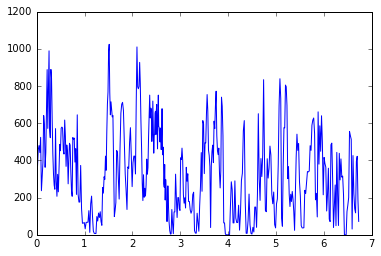

In [18]:
plt.plot((np.array(effort['distance'].data)-effort['distance'].data[0])/1000, effort['watts'].data)

# Creating a database of professional cyclists on Strava
The first task was to use Beautifulsoup to scrape the page listing Strava's pros. 

In [19]:
import urllib.request
f = urllib.request.urlopen('https://www.strava.com/pros')
myfile = f.read().decode("utf-8")
f.close()



In [ ]:
myfile[40000:40500]

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(myfile, 'html.parser')


In [ ]:
Pros = []
LIs = soup.find_all('li')
for li in LIs:
    if li.img:
        id_ = [li.img['src'].split('/')[5],li.img['title']]
        try:
            team = [li.strong.string.encode('utf-8').decode()]
        except:
            team = [None]
        try:
            location = [li.find('div', 'location' ).string.encode('utf-8').decode().replace('\n','')]
        except:
            location = [None]
        try:
            description = [li.find('div', 'description' ).string.encode('utf-8').decode()]
        except:
            description = [None]
        Pros += [id_ +  team + location + description]
    
Pros[:10]

Athlete_type and badge_type_id don't seem to be much use, but I should be able to get the Team if it exists. This will allow me to filter out the pro cyclists I'm after

In [ ]:
athlete = client.get_athlete(8309)
print(athlete.athlete_type)

The best course of action is to dump the results into a Pandas DataFrame, export to Excel, tidy up the data and read the cleaned-up data.

In [ ]:
dfPros = pd.DataFrame(Pros, columns = ['id','Name','Team','Location','Description'])


In [ ]:
# Do this once
#dfPros.to_excel('Pros.xlsx')

## Cleaning up the data
I loaded this file into Excel and manually selected professional cyclists, entering/correcting their teams where necessary. The trick to find the Strava id from the image did not work for all athetes, so the few missing ones were also completed manually. This resulted in a list of 209 cyclists from the original 1000+ professional athletes on Strava.  Now load the cleaned up file. 

In [17]:
PC= pd.read_excel('ProCyclists.xlsx')
len(PC)

209

In [18]:
PC.head()

,id,Name,Team,Location,Description
45,3943249,jan bakelants,AG2R,"Scherpenheuvel Zichem, Flanders",NaN
47,1630132,Romain Bardet,AG2R,"Clermont Ferrand, Auvergne",NaN
245,3114986,Samuel DUMOULIN,AG2R,"Jacob-Bellecombette, Rhône-Alpes",Coureur cycliste professionnel depuis 2002
518,7347052,Pierre Latour,AG2R,"Romans-sur-Isère, Rhône-Alpes","Hey, what did you expect !?"
943,1934385,Alexis Vuillermoz,AG2R,"Chevry, Franche-Comté",NaN


In [19]:
PC.loc[45].id

3943249

In [20]:
koms = client.get_athlete_koms(PC.loc[45].id)


In [21]:
len([k for k in koms])

162

In [22]:
PC['KOMs'] = np.nan
PC['nKOMs'] = np.nan


In [23]:
PC.loc[45, 'KOMs'] = [koms]
len([k for k in PC.loc[45, 'KOMs'][0]])

162

In [24]:
for i in PC.index:
    koms = client.get_athlete_koms(PC.loc[i].id)
    PC.loc[i, 'KOMs'] = [koms]
    PC.loc[i, 'nKOMs'] = len([k for k in koms])

In [25]:
PC.head()

,id,Name,Team,Location,Description,KOMs,nKOMs
45,3943249,jan bakelants,AG2R,"Scherpenheuvel Zichem, Flanders",NaN,[<BatchedResultsIterator entity=SegmentEffort>],162.0
47,1630132,Romain Bardet,AG2R,"Clermont Ferrand, Auvergne",NaN,[<BatchedResultsIterator entity=SegmentEffort>],978.0
245,3114986,Samuel DUMOULIN,AG2R,"Jacob-Bellecombette, Rhône-Alpes",Coureur cycliste professionnel depuis 2002,[<BatchedResultsIterator entity=SegmentEffort>],75.0
518,7347052,Pierre Latour,AG2R,"Romans-sur-Isère, Rhône-Alpes","Hey, what did you expect !?",[<BatchedResultsIterator entity=SegmentEffort>],327.0
943,1934385,Alexis Vuillermoz,AG2R,"Chevry, Franche-Comté",NaN,[<BatchedResultsIterator entity=SegmentEffort>],130.0


Unfortunately, Pandas cannot pickle Stava's BatchedResultsIterator. Until there is a way around this, that data will be lost each time.

In [28]:
df = PC[['id','Name','Team','Location','Description','nKOMs']]
df.to_pickle('ProCyclistData.pkl')

In [36]:
PC.sort_values(by='nKOMs', ascending=False)[['Name','Team','Location','nKOMs']].iloc[:10]


,Name,Team,Location,nKOMs
861,Laurens ten Dam,Team Sunweb,"Oudorp , noord Holland.",1907.0
540,Elisa Longo Borghini,Wiggle Honda,"Ornavasso, Piemonte",1381.0
918,Annemiek van Vleuten,Orica AIS,"Wageningen, GE",1296.0
863,Niki Terpstra Racing,Quick-Step Floors,Noord-Holland,1230.0
358,James Gullen,JLT Condor,"Lancaster, England",1162.0
698,Thibaut Pinot,FDJ,"Mélisey, Franche-Comté",1070.0
265,Dan Evans,Cannodale-Drapac Pro Cycling Team,Wales,1035.0
47,Romain Bardet,AG2R,"Clermont Ferrand, Auvergne",978.0
235,Joe Dombrowski,Cannodale-Drapac Pro Cycling Team,"Nice, Provence-Alpes-Côte d'Azur",864.0
476,Dani King,Cylance,Wales,852.0


In [ ]:
PC.head()

In [56]:
df.to_excel('ProCyclistKOMs.xlsx')